In [1]:
ls

 Volume in drive D is DATA
 Volume Serial Number is 9CEC-921D

 Directory of d:\ML\Google colab\stock all

04/05/2024  09:27 PM    <DIR>          .
04/08/2024  12:05 PM    <DIR>          ..
04/05/2024  09:27 PM                 0 stock.ipynb
               1 File(s)              0 bytes
               2 Dir(s)  119,931,219,968 bytes free


In [3]:
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
df = pd.read_csv("bank.csv")
df
df.set_index('Datetime', inplace=True)
df.fillna(method="ffill", inplace=True)	
scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)
lookback_window = 1 
features = 5
def create_sequences(data, lookback_window):
    X, y = [], []
    for i in range(len(data) - lookback_window - 1): 
        X.append(data[i:(i + lookback_window), :])
        y.append(data[i + lookback_window, 0:5]) 
    return np.array(X), np.array(y)
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(lookback_window, features)))
model.add(LSTM(units=50))
model.add(Dense(units=5)) 
model.compile(loss='mean_squared_error', optimizer='adam')
X, y = create_sequences(df_scaled, lookback_window)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]




model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))
y_pred = model.predict(X_test)
y_pred_original = scaler.inverse_transform(y_pred)
data = pd.DataFrame(y_pred_original, columns=['open', 'high', 'low' ,'close','tradedqty'])
data
frequency = 'T'
start_time = '2024-01-30 14:14:00+00'
end_time = pd.to_datetime(start_time) + pd.DateOffset(minutes=len(data) - 1)
date_range = pd.date_range(start=start_time, end=end_time, freq=frequency)
data['lasttradetime'] = date_range
data.set_index('lasttradetime', inplace=True)
data.to_csv('Lstm.csv')

Epoch 1/50


C:\Users\santh\AppData\Local\Temp\ipykernel_6780\2143961988.py:9: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method="ffill", inplace=True)
c:\Users\santh\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 47ms/step - loss: 0.1559 - val_loss: 0.0623
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1217 - val_loss: 0.0482
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1002 - val_loss: 0.0323
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0577 - val_loss: 0.0179
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0244 - val_loss: 0.0159
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0075 - val_loss: 0.0260
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0063 - val_loss: 0.0234
Epoch 8/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0048 - val_loss: 0.0197
Epoch 9/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.0042 - val_loss: 0.0191
Epoch 10/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0039 - val_loss: 0.0196
Epoch 11/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0039 - val_loss: 0.0193
Epoch 12/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0031 - val_loss: 0.0187

C:\Users\santh\AppData\Local\Temp\ipykernel_6780\2143961988.py:41: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  date_range = pd.date_range(start=start_time, end=end_time, freq=frequency)


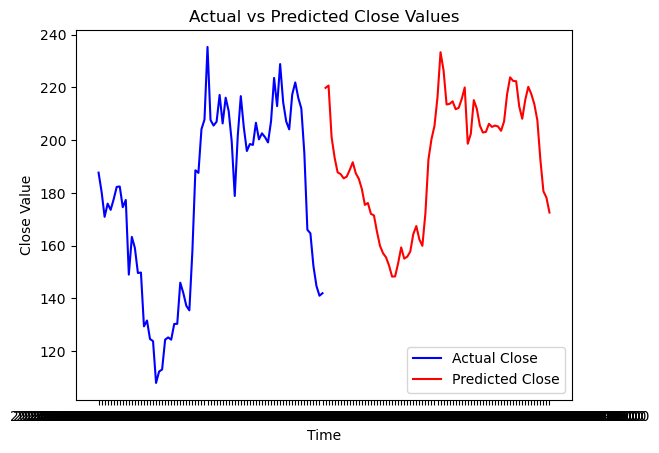

In [5]:
# Convert index to string format
data.index = data.index.astype(str)

# Plotting the actual close values from the original dataset
plt.plot(df.index[train_size+lookback_window+1:], df['close'][train_size+lookback_window+1:], label='Actual Close', color='blue')

# Plotting the predicted close values from your LSTM model
plt.plot(data.index, data['close'], label='Predicted Close', color='red')

# Adding labels and title
plt.xlabel('Time')
plt.ylabel('Close Value')
plt.title('Actual vs Predicted Close Values')
plt.legend()

# Displaying the plot
plt.show()
